# [Census-Income (KDD) Data Set](https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29?fbclid=IwAR33gBAA7qDGXZuVj8Fye0SUnOXItybE2hy_4eCIUjYU3lHBwdIBFRdnSKI)
## Spis powszechny ludności Stanów Zjednoczonych w latach 1994-1995


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_profiling
%matplotlib inline

In [36]:
columns = lineList = [line.rstrip('\n') for line in open('data/census-income.names')]
data = pd.read_csv('data/census-income.data', sep = ',', header=None, index_col=False, names=columns)

In [37]:
data.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin,veterans benefits,weeks worked in year,year,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [70]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,199523.0,34.494199,22.310895,0.00,15.000,33.00,50.00,90.0
detailed industry recode,199523.0,15.352320,18.067129,0.00,0.000,0.00,33.00,51.0
detailed occupation recode,199523.0,11.306556,14.454204,0.00,0.000,0.00,26.00,46.0
wage per hour,199523.0,55.426908,274.896454,0.00,0.000,0.00,0.00,9999.0
capital gains,199523.0,434.718990,4697.531280,0.00,0.000,0.00,0.00,99999.0
capital losses,199523.0,37.313788,271.896428,0.00,0.000,0.00,0.00,4608.0
dividends from stocks,199523.0,197.529533,1984.163658,0.00,0.000,0.00,0.00,99999.0
instance weight,199523.0,1740.380269,993.768156,37.87,1061.615,1618.31,2188.61,18656.3
num persons worked for employer,199523.0,1.956180,2.365126,0.00,0.000,1.00,4.00,6.0
own business or self employed,199523.0,0.175438,0.553694,0.00,0.000,0.00,0.00,2.0


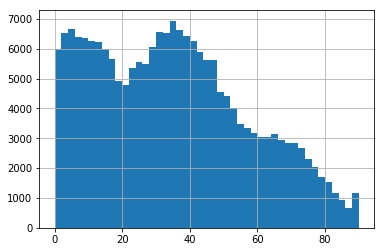

In [50]:
data['age'].hist(bins=45)

In [51]:
pd.DataFrame(data['age'].describe()[['mean','50%','min','max']].round(2))

,age
mean,34.49
50%,33.00
min,0.00
max,90.00


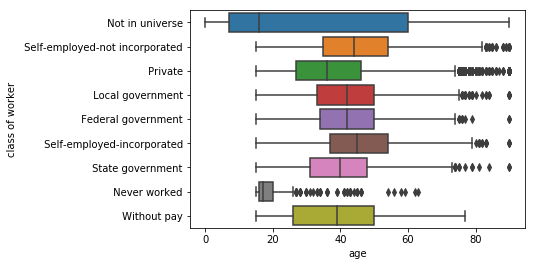

In [52]:
sns.boxplot(x = "age", y = "class of worker", data = data)

##### nie jest jakoś super deskryptywne, ale pokazuje, że ludzie zarabiają hajsy i bez studiów

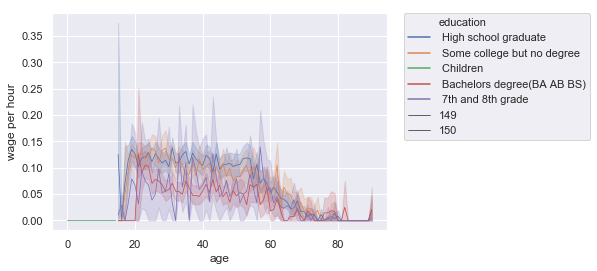

In [85]:
sns.set(style="darkgrid")
popular_educations = data["education"].value_counts().head(5)
data_popular_educations = data[data["education"].isin(popular_educations.keys())]

sns.lineplot(x = data["age"], hue = data_popular_educations["education"], y = data["wage per hour"] > 0, size = 150)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

##### ile średnio zarabiał obywatel USA w latach 94/95 ?

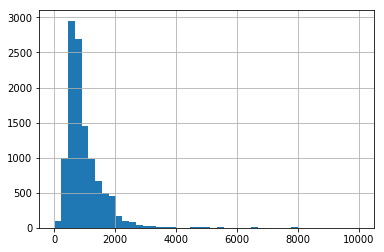

In [48]:
wage_per_hour = data['wage per hour']
wage_per_hour[wage_per_hour>0].hist(bins=45)

##### Jak zarobki mają się do wieku?

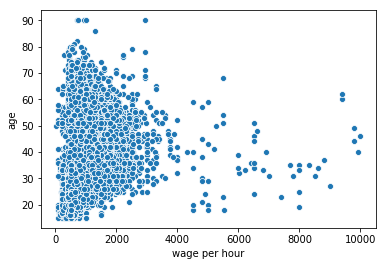

In [49]:
sns.scatterplot(x = wage_per_hour[wage_per_hour>0], y = data["age"])

##### a jak zarobki mają się do ilości przepracowanych tygodni?

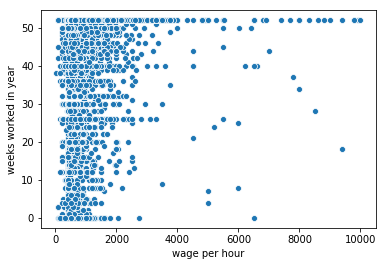

In [58]:
sns.scatterplot(x = wage_per_hour[wage_per_hour>0], y = data["weeks worked in year"])

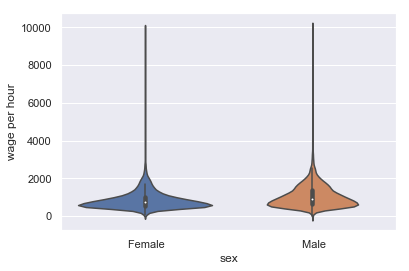

In [75]:
sns.violinplot(y = wage_per_hour[wage_per_hour>0],  x = data["sex"])

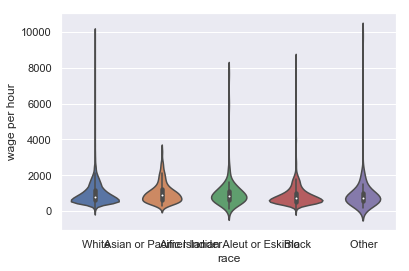

In [76]:
sns.violinplot(y = wage_per_hour[wage_per_hour>0],  x = data["race"])